In [22]:
from importlib import reload

import myutman
reload(myutman.stand_utils)
reload(myutman.stand)
reload(myutman.window_algo)
reload(myutman.generation)
reload(myutman.fuse)

from myutman.fuse import FuseForWindowAlgo
from myutman.generation import ClientTerminalsReorderSampleGeneration, ChangeWithClientSampleGeneration, \
    ChangeWithTerminalSampleGeneration, ChangeSampleGeneration, StillSampleGeneration
from myutman.node_distribution import RoundrobinNodeDistribution, DependentNodeDistribution, \
    SecondMetaDependentNodeDistribution
from myutman.stand import Stand
from myutman.stand_utils import compare_vals, show_boxplots
from myutman.window_algo import WindowStreamingAlgo

import json

In [2]:
n_nodes = 10
stand_roundrobins = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_client_dependent = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=SecondMetaDependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_terminal_dependent = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=SecondMetaDependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_resharding = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)

In [3]:
stands = [
    stand_roundrobins,
    stand_client_dependent,
    stand_terminal_dependent,
    stand_resharding
]

generations = [
    ChangeSampleGeneration
]

results = [[[] for _ in stands] for _ in generations]
for state in range(10):
    for i, generation in enumerate(generations):
        sample, change_points = generation(state=state)()
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                n_clients=20,
                n_terminals=20
            )
            print(result1)
            results[i][j].append(result1)

100000it [17:14, 96.63it/s]


{'TDR': 0.6593406593406593, 'MDR': 0.34065934065934067, 'FDR': 0.3548387096774194, 'latency': 388.98333333333335}


100000it [33:02, 50.43it/s]


{'TDR': 0.6813186813186813, 'MDR': 0.31868131868131866, 'FDR': 0.504, 'latency': 313.80645161290323}


100000it [33:57, 49.07it/s]


{'TDR': 0.6483516483516484, 'MDR': 0.3516483516483516, 'FDR': 0.3058823529411765, 'latency': 453.4406779661017}


100000it [46:42, 35.68it/s]


{'TDR': 0.7142857142857143, 'MDR': 0.2857142857142857, 'FDR': 0.4298245614035088, 'latency': 401.9384615384615}


100000it [22:56, 72.63it/s]


{'TDR': 0.4725274725274725, 'MDR': 0.5274725274725275, 'FDR': 0.36764705882352944, 'latency': 408.2093023255814}


100000it [37:58, 43.89it/s]


{'TDR': 0.7252747252747253, 'MDR': 0.27472527472527475, 'FDR': 0.42105263157894735, 'latency': 314.27272727272725}


100000it [37:34, 44.36it/s]


{'TDR': 0.5494505494505495, 'MDR': 0.4505494505494505, 'FDR': 0.25373134328358204, 'latency': 417.52}


100000it [44:49, 37.19it/s]


{'TDR': 0.6483516483516484, 'MDR': 0.3516483516483516, 'FDR': 0.3979591836734694, 'latency': 306.59322033898303}


100000it [17:35, 94.78it/s]


{'TDR': 0.5824175824175825, 'MDR': 0.41758241758241754, 'FDR': 0.4301075268817204, 'latency': 410.79245283018867}


100000it [35:30, 46.93it/s]


{'TDR': 0.8461538461538461, 'MDR': 0.15384615384615385, 'FDR': 0.493421052631579, 'latency': 317.4155844155844}


100000it [36:14, 45.98it/s]


{'TDR': 0.6043956043956044, 'MDR': 0.39560439560439564, 'FDR': 0.38888888888888884, 'latency': 376.8545454545455}


100000it [42:48, 38.93it/s]


{'TDR': 0.8241758241758241, 'MDR': 0.17582417582417587, 'FDR': 0.460431654676259, 'latency': 298.92}


100000it [18:08, 91.85it/s]


{'TDR': 0.6043956043956044, 'MDR': 0.39560439560439564, 'FDR': 0.375, 'latency': 487.4909090909091}


100000it [34:05, 48.90it/s]


{'TDR': 0.6373626373626373, 'MDR': 0.3626373626373627, 'FDR': 0.4774774774774775, 'latency': 369.2241379310345}


100000it [33:05, 50.37it/s]


{'TDR': 0.6043956043956044, 'MDR': 0.39560439560439564, 'FDR': 0.3820224719101124, 'latency': 474.3454545454546}


100000it [43:07, 38.64it/s]


{'TDR': 0.5714285714285714, 'MDR': 0.4285714285714286, 'FDR': 0.5094339622641509, 'latency': 374.6923076923077}


100000it [15:19, 108.75it/s]


{'TDR': 0.6593406593406593, 'MDR': 0.34065934065934067, 'FDR': 0.4, 'latency': 408.31666666666666}


100000it [31:57, 52.14it/s]


{'TDR': 0.7912087912087912, 'MDR': 0.20879120879120883, 'FDR': 0.4666666666666667, 'latency': 319.06944444444446}


100000it [32:06, 51.90it/s]


{'TDR': 0.6483516483516484, 'MDR': 0.3516483516483516, 'FDR': 0.38541666666666663, 'latency': 378.22033898305085}


100000it [42:29, 39.22it/s]


{'TDR': 0.7362637362637363, 'MDR': 0.2637362637362637, 'FDR': 0.46825396825396826, 'latency': 301.2985074626866}


100000it [17:27, 95.47it/s]


{'TDR': 0.6703296703296703, 'MDR': 0.3296703296703297, 'FDR': 0.35106382978723405, 'latency': 457.1311475409836}


100000it [33:32, 49.70it/s]


{'TDR': 0.7912087912087912, 'MDR': 0.20879120879120883, 'FDR': 0.4626865671641791, 'latency': 296.09722222222223}


100000it [33:56, 49.11it/s]


{'TDR': 0.5714285714285714, 'MDR': 0.4285714285714286, 'FDR': 0.3580246913580247, 'latency': 542.8461538461538}


100000it [43:10, 38.61it/s]


{'TDR': 0.7032967032967034, 'MDR': 0.29670329670329665, 'FDR': 0.4576271186440678, 'latency': 284.40625}


100000it [19:44, 84.46it/s]


{'TDR': 0.5714285714285714, 'MDR': 0.4285714285714286, 'FDR': 0.3580246913580247, 'latency': 446.13461538461536}


100000it [34:21, 48.51it/s]


{'TDR': 0.7582417582417582, 'MDR': 0.2417582417582418, 'FDR': 0.43442622950819676, 'latency': 256.27536231884056}


100000it [36:06, 46.16it/s]


{'TDR': 0.5714285714285714, 'MDR': 0.4285714285714286, 'FDR': 0.2676056338028169, 'latency': 436.7307692307692}


100000it [43:18, 38.48it/s]


{'TDR': 0.7472527472527473, 'MDR': 0.25274725274725274, 'FDR': 0.4035087719298246, 'latency': 265.97058823529414}


100000it [18:03, 92.26it/s]


{'TDR': 0.6703296703296703, 'MDR': 0.3296703296703297, 'FDR': 0.3296703296703297, 'latency': 493.88524590163934}


100000it [33:12, 50.19it/s]


{'TDR': 0.7252747252747253, 'MDR': 0.27472527472527475, 'FDR': 0.472, 'latency': 317.6212121212121}


100000it [35:59, 46.30it/s]


{'TDR': 0.5054945054945055, 'MDR': 0.4945054945054945, 'FDR': 0.36111111111111116, 'latency': 340.0217391304348}


100000it [43:36, 38.21it/s]


{'TDR': 0.6263736263736264, 'MDR': 0.37362637362637363, 'FDR': 0.4672897196261683, 'latency': 245.33333333333334}


100000it [16:12, 102.87it/s]


{'TDR': 0.6373626373626373, 'MDR': 0.3626373626373627, 'FDR': 0.4020618556701031, 'latency': 449.3103448275862}


100000it [33:19, 50.01it/s]


{'TDR': 0.7142857142857143, 'MDR': 0.2857142857142857, 'FDR': 0.45833333333333337, 'latency': 327.67692307692306}


100000it [35:02, 47.55it/s]


{'TDR': 0.6263736263736264, 'MDR': 0.37362637362637363, 'FDR': 0.3448275862068966, 'latency': 410.1578947368421}


100000it [43:38, 38.18it/s]


{'TDR': 0.6593406593406593, 'MDR': 0.34065934065934067, 'FDR': 0.4642857142857143, 'latency': 311.28333333333336}


100000it [18:47, 88.69it/s]


{'TDR': 0.6153846153846154, 'MDR': 0.3846153846153846, 'FDR': 0.3707865168539326, 'latency': 507.4107142857143}


100000it [33:27, 49.81it/s]


{'TDR': 0.7582417582417582, 'MDR': 0.2417582417582418, 'FDR': 0.4152542372881356, 'latency': 299.39130434782606}


100000it [32:56, 50.60it/s]


{'TDR': 0.6593406593406593, 'MDR': 0.34065934065934067, 'FDR': 0.2857142857142857, 'latency': 475.98333333333335}


100000it [44:08, 37.75it/s]


{'TDR': 0.5714285714285714, 'MDR': 0.4285714285714286, 'FDR': 0.4222222222222223, 'latency': 238.28846153846155}


In [105]:
results[0].append([])

In [106]:
stand_centralized = Stand(
    n_nodes=1,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo()
)

In [107]:
for state in range(10):
    sample, change_points = generation(state=state)()
    result1 = stand_centralized.test(
        p=0.05,
        sample=sample,
        change_points=change_points,
        n_clients=20,
        n_terminals=20
    )
    print(result1)
    results[0][4].append(result1)

100000it [27:07, 61.44it/s]


{'TDR': 0.6813186813186813, 'MDR': 0.31868131868131866, 'FDR': 0.5118110236220472, 'latency': 308.4193548387097}


100000it [26:47, 62.19it/s]


{'TDR': 0.6923076923076923, 'MDR': 0.3076923076923077, 'FDR': 0.4878048780487805, 'latency': 262.76190476190476}


100000it [26:36, 62.63it/s]


{'TDR': 0.7252747252747253, 'MDR': 0.27472527472527475, 'FDR': 0.46341463414634143, 'latency': 257.1060606060606}


100000it [26:45, 62.29it/s]


{'TDR': 0.6703296703296703, 'MDR': 0.3296703296703297, 'FDR': 0.44036697247706424, 'latency': 252.01639344262296}


100000it [26:27, 63.00it/s]


{'TDR': 0.6813186813186813, 'MDR': 0.31868131868131866, 'FDR': 0.4464285714285714, 'latency': 342.6774193548387}


100000it [27:54, 59.72it/s]


{'TDR': 0.6813186813186813, 'MDR': 0.31868131868131866, 'FDR': 0.3980582524271845, 'latency': 296.3709677419355}


100000it [26:43, 62.35it/s]


{'TDR': 0.6153846153846154, 'MDR': 0.3846153846153846, 'FDR': 0.4862385321100917, 'latency': 283.67857142857144}


100000it [27:09, 61.38it/s]


{'TDR': 0.6043956043956044, 'MDR': 0.39560439560439564, 'FDR': 0.4086021505376344, 'latency': 311.4}


100000it [26:59, 61.75it/s]


{'TDR': 0.5934065934065934, 'MDR': 0.4065934065934066, 'FDR': 0.4653465346534653, 'latency': 295.3888888888889}


100000it [26:46, 62.25it/s]

{'TDR': 0.6923076923076923, 'MDR': 0.3076923076923077, 'FDR': 0.42201834862385323, 'latency': 357.3333333333333}


In [ ]:
still_results = [[[] for _ in stands]] 
for state in range(1):
    for i, generation in enumerate([StillSampleGeneration(state=state)]):
        sample, change_points = generation(state=state)()
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                n_clients=20,
                n_terminals=20
            )
            print(result1)
            still_results[i][j].append(result1)

In [8]:
import json

with open('results.json', 'w') as results_file:
    json.dump(results, results_file, indent=4, ensure_ascii=False)

In [25]:
with open('tuned_sizes_results.json') as input_file:
    results = json.load(input_file)

In [26]:
len(results[0][0])

89

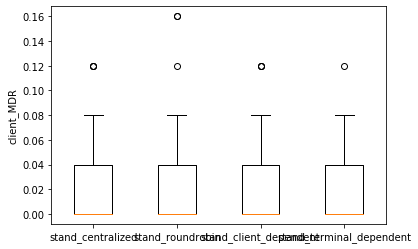

In [27]:
show_boxplots('client_MDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

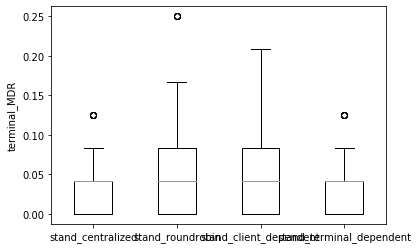

In [28]:
show_boxplots('terminal_MDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

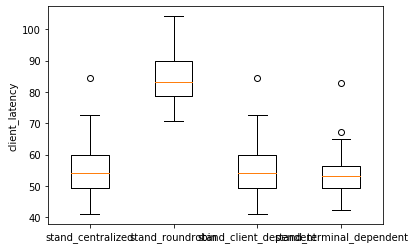

In [29]:
show_boxplots('client_latency', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

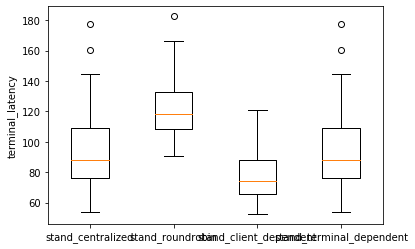

In [30]:
show_boxplots('terminal_latency', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

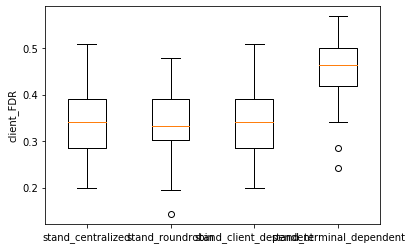

In [31]:
show_boxplots('client_FDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

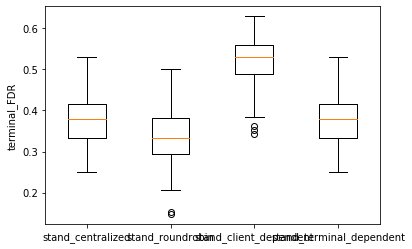

In [32]:
show_boxplots('terminal_FDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

## Roundrobin vs Client dependency

In [33]:
compare_vals('client_FDR', results[0][0], results[0][1], 'stand_centralized', 'stand_roundrobins')

Results of Wilcoxon T-test of stand_centralized client_FDR to be less then stand_roundrobins client_FDR is WilcoxonResult(statistic=1618.0, pvalue=0.45639464228255644)


In [34]:
compare_vals('terminal_FDR', results[0][0], results[0][1], 'stand_centralized', 'stand_roundrobins')

Results of Wilcoxon T-test of stand_centralized terminal_FDR to be less then stand_roundrobins terminal_FDR is WilcoxonResult(statistic=1034.5, pvalue=7.482154993017724e-05)


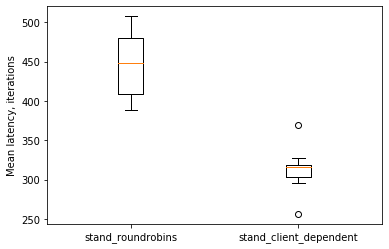

In [94]:
compare_latencies(results[0][0], results[0][1], 'stand_roundrobins', 'stand_client_dependent')

## Roundrobin vs Terminal dependency

In [95]:
compare_mdrs(results[0][0], results[0][2], 'stand_roundrobins', 'stand_terminal_dependent')

Results of Wilcoxon T-test of stand_roundrobins MDR to be less then stand_terminal_dependent MDR is WilcoxonResult(statistic=15.0, pvalue=0.3364546554578759)


/Users/myutman/Documents/distributed-changepoint-detection/venv/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [96]:
compare_fdrs(results[0][0], results[0][2], 'stand_roundrobins', 'stand_terminal_dependent')

Results of Wilcoxon T-test of stand_roundrobins FDR to be less then stand_terminal_dependent FDR is WilcoxonResult(statistic=48.0, pvalue=0.9816710356638927)


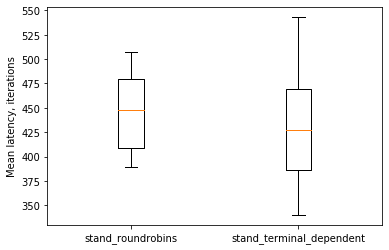

In [97]:
compare_latencies(results[0][0], results[0][2], 'stand_roundrobins', 'stand_terminal_dependent')

## Client dependency vs Resharding

In [98]:
compare_mdrs(results[0][1], results[0][3], 'stand_client_dependent', 'stand_resharding')

Results of Wilcoxon T-test of stand_client_dependent MDR to be less then stand_resharding MDR is WilcoxonResult(statistic=3.0, pvalue=0.0062576593450369864)


In [99]:
compare_fdrs(results[0][1], results[0][3], 'stand_client_dependent', 'stand_resharding')

Results of Wilcoxon T-test of stand_client_dependent FDR to be less then stand_resharding FDR is WilcoxonResult(statistic=37.0, pvalue=0.8335601227158056)


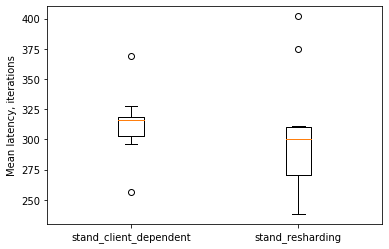

In [100]:
compare_latencies(results[0][1], results[0][3], 'stand_client_dependent', 'stand_resharding')

## Terminal dependency vs Resharding

In [101]:
compare_mdrs(results[0][2], results[0][3], 'stand_terminal_dependent', 'stand_resharding')

Results of Wilcoxon T-test of stand_terminal_dependent MDR to be less then stand_resharding MDR is WilcoxonResult(statistic=49.0, pvalue=0.9858943167201291)


In [102]:
compare_fdrs(results[0][2], results[0][3], 'stand_terminal_dependent', 'stand_resharding')

Results of Wilcoxon T-test of stand_terminal_dependent FDR to be less then stand_resharding FDR is WilcoxonResult(statistic=0.0, pvalue=0.002531016063133932)


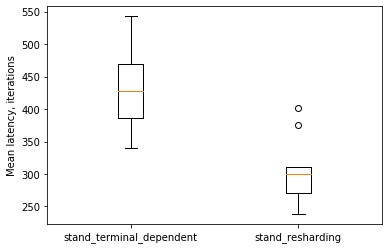

In [103]:
compare_latencies(results[0][2], results[0][3], 'stand_terminal_dependent', 'stand_resharding')